使用官方提供的示例，成功微调出广告数据集，要求使用 Lora 进行微调：

1. 你能看到 loss 的下降，并在最终回到 3.2 左右。
2. 你需要自己适配 inference.py 中的代码，并迁移到其他的推理框架中。例如，basic_demo 中没有读取微调模型后的 adapter 的内容，你需要参考 inference.py 的代码并进行修改，让其他 demo 能读入你的微调代码，将其部署到 basic_demo 下的 gradio_demo 中，并能够通过 webui 来进行调用。

## 0. 环境检查

In [8]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://mirrors.aliyun.com/pypi/simple


## 1. 准备数据集

In [9]:
import json
from typing import Union
from pathlib import Path


def _resolve_path(path: Union[str, Path]) -> Path:
    return Path(path).expanduser().resolve()


def _mkdir(dir_name: Union[str, Path]):
    dir_name = _resolve_path(dir_name)
    if not dir_name.is_dir():
        dir_name.mkdir(parents=True, exist_ok=False)


def convert_adgen(data_dir: Union[str, Path], save_dir: Union[str, Path]):
    def _convert(in_file: Path, out_file: Path):
        _mkdir(out_file.parent)
        with open(in_file, encoding='utf-8') as fin:
            with open(out_file, 'wt', encoding='utf-8') as fout:
                for line in fin:
                    dct = json.loads(line)
                    sample = {'conversations': [{'role': 'user', 'content': dct['content']},
                                                {'role': 'assistant', 'content': dct['summary']}]}
                    fout.write(json.dumps(sample, ensure_ascii=False) + '\n')

    data_dir = _resolve_path(data_dir)
    save_dir = _resolve_path(save_dir)

    train_file = data_dir / 'train.json'
    if train_file.is_file():
        out_file = save_dir / train_file.relative_to(data_dir)
        _convert(train_file, out_file)

    dev_file = data_dir / 'dev.json'
    if dev_file.is_file():
        out_file = save_dir / dev_file.relative_to(data_dir)
        _convert(dev_file, out_file)


convert_adgen('data/AdvertiseGen', 'data/AdvertiseGen_fix')

## 2. 使用命令行开始微调,我们使用 lora 进行微调
```
CUDA_VISIBLE_DEVICES=0 NCCL_P2P_DISABLE="1" NCCL_IB_DISABLE="1" python finetune_hf.py  data/AdvertiseGen_fix /root/onethingai-tmp/chatglm3-6b configs/lora.yaml
```



In [1]:
!CUDA_VISIBLE_DEVICES=0 NCCL_P2P_DISABLE="1" NCCL_IB_DISABLE="1" python finetune_hf.py  data/AdvertiseGen_fix /root/onethingai-tmp/chatglm3-6b configs/lora.yaml

Traceback (most recent call last):
  File "/root/onethingai-tmp/LLM-learn/zhipu/finetune_hf.py", line 14, in <module>
    from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
ModuleNotFoundError: No module named 'nltk'


In [2]:
!pip install nltk

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.1 MB/s eta 0:00:00 0:00:01


In [3]:
!CUDA_VISIBLE_DEVICES=0 NCCL_P2P_DISABLE="1" NCCL_IB_DISABLE="1" python finetune_hf.py  data/AdvertiseGen_fix /root/onethingai-tmp/chatglm3-6b configs/lora.yaml

Setting eos_token is not supported, use the default one.
Setting pad_token is not supported, use the default one.
Setting unk_token is not supported, use the default one.
Loading checkpoint shards: 100%|██████████████████| 7/7 [00:03<00:00,  1.85it/s]
trainable params: 1,949,696 || all params: 6,245,533,696 || trainable%: 0.0312
--> Model

--> model has 1.949696M params

Setting num_proc from 16 back to 1 for the train split to disable multiprocessing as it only contains one shard.
Generating train split: 114599 examples [00:00, 682368.42 examples/s]
Setting num_proc from 16 back to 1 for the validation split to disable multiprocessing as it only contains one shard.
Generating validation split: 1070 examples [00:00, 259116.93 examples/s]
Setting num_proc from 16 back to 1 for the test split to disable multiprocessing as it only contains one shard.
Generating test split: 1070 examples [00:00, 365345.59 examples/s]
Map (num_proc=16): 100%|██████| 114599/114599 [00:02<00:00, 48773.71 exam

查看占用7870端口进程
```
netstat -tulnp | grep 7870
```

## 3. 使用微调的数据集进行推理
```
!CUDA_VISIBLE_DEVICES=0 NCCL_P2P_DISABLE="1" NCCL_IB_DISABLE="1" python inference_hf.py output/checkpoint-3000/ --prompt "类型#裙*版型#显瘦*材质#网纱*风格#性感*裙型#百褶*裙下摆#压褶*裙长#连衣裙*裙衣门襟#拉链*裙衣门襟#套头*裙款式#拼接*裙款式#拉链*裙款式#木耳边*裙款式#抽褶*裙款式#不规则"
```

In [4]:
!CUDA_VISIBLE_DEVICES=0 NCCL_P2P_DISABLE="1" NCCL_IB_DISABLE="1" python inference_hf.py output/checkpoint-3000/ --prompt "类型#裙*版型#显瘦*材质#网纱*风格#性感*裙型#百褶*裙下摆#压褶*裙长#连衣裙*裙衣门襟#拉链*裙衣门襟#套头*裙款式#拼接*裙款式#拉链*裙款式#木耳边*裙款式#抽褶*裙款式#不规则"

Loading checkpoint shards: 100%|██████████████████| 7/7 [00:04<00:00,  1.64it/s]
Setting eos_token is not supported, use the default one.
Setting pad_token is not supported, use the default one.
Setting unk_token is not supported, use the default one.
这款连衣裙，版型是显瘦的套头款，领口是木耳边设计，露肩的袖口设计，性感又时尚。袖口和裙摆都是百褶压褶设计，不规则的压褶设计，更显时尚。裙身是网纱拼接设计，整体造型感很足，拉链门襟设计，方便穿脱。


## 4. 通过 webui 来进行调用

In [5]:
!python web_gradio.py

Loading checkpoint shards: 100%|██████████████████| 7/7 [00:04<00:00,  1.61it/s]
Setting eos_token is not supported, use the default one.
Setting pad_token is not supported, use the default one.
Setting unk_token is not supported, use the default one.
Running on local URL:  http://0.0.0.0:7870

To create a public link, set `share=True` in `launch()`.


====conversation====
 [{'role': 'user', 'content': '类型#裙*版型#显瘦*材质#网纱*风格#性感*裙型#百褶*裙下摆#压褶*裙长#连衣裙*裙衣门襟#拉链*裙衣门襟#套头*裙款式#拼接*裙款式#拉链*裙款式#木耳边*裙款式#抽褶*裙款式#不规则'}]
^C
Keyboard interruption in main thread... closing server.


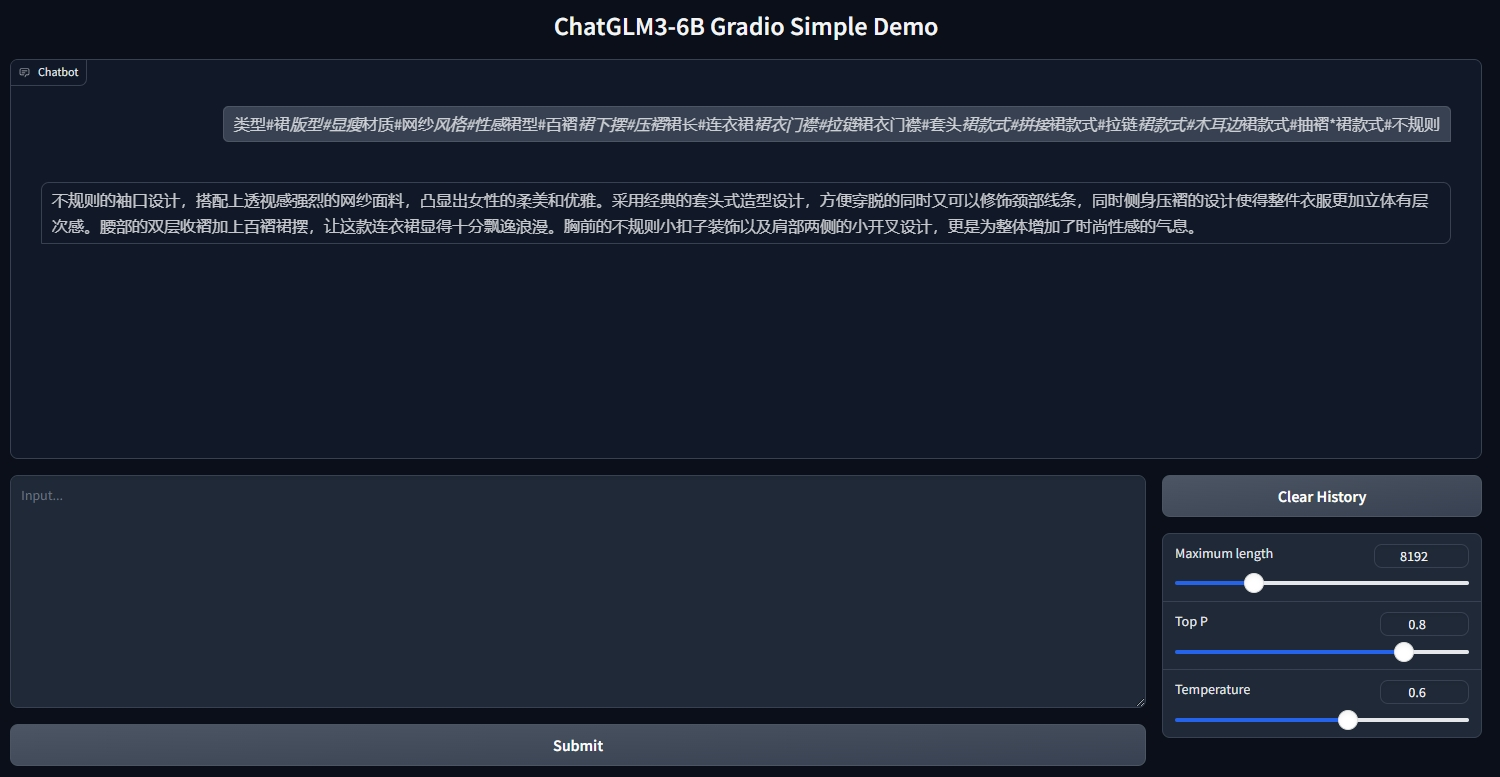